
Referências:

 [cms-opendata-workshop](https://github.com/cms-opendata-workshop/workshop2024-lesson-event-selection/blob/main/instructors/data_selection_lesson.ipynb)

[Scikit-HEP project](https://scikit-hep.org/)

---
# Hands-On: Análise de Dados

 Parte I

1. Vamos analisar dados reais do tipo NanoAOD do run2 de 2016 (Era G).


2. Escolher um arquivo específico da lista disponibilizada pelo [CMS Open Data](https://opendata.cern.ch/record/30522/files/CMS_Run2016G_DoubleMuon_NANOAOD_UL2016_MiniAODv2_NanoAODv9-v2_2430000_file_index.txt).


  * Abrir e ler o arquivo com o *uproot*.
  * Verificar o que contém nesse arquivo.

3. Cortes de pré-seleção.


4. Plotar algumas variáveis cinemáticas de cada múon: $p_{T}$, η (pseudorapidez), ϕ, ...


5. Criar os 4-vetores dos múons e do par.


6. Plotar $p_{T}$ e η do par de múons

7. Calcular a massa invariante do par de múons.

8. Criar um dataframe e salvar as informações desejadas.



---


In [28]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# **Parte I**

# Instalar: coffea, uproot, awkward

coffea, uproot, e awkward são três bibliotecas importantes para análise de dados em Física de Altas Energias (HEP), elas facilitam o trabalho com arquivos ROOT, que são utilizados no contexto dos experimentos no CERN.


* [coffea](https://github.com/CoffeaTeam/coffea
)

* [uproot](https://uproot.readthedocs.io/en/latest/basic.html)

*   [awkward](https://awkward-array.org/doc/main/)

* Ferramentas adicionais:
    * **pandas**: biblioteca para estruturas de dados tabulares e ferramentas de análise em Python.( [documentação do pandas](https://pandas.pydata.org/docs/getting_started/index.html))

  * **numpy**: fornece cálculos numéricos, como criação de histogramas.

  * **matplotlib**: ferramenta comum para criar gráficos, figuras, imagens, visualizações.

  * **vector**: é especializada no trabalho com vetores em 2D, 3D e vetores de Lorentz. Esta biblioteca foi projetada para funcionar com versões do Python 3.8 ou superiores.([documentação do vector](https://vector.readthedocs.io/en/latest/))



In [29]:
try:
  import coffea
except ImportError as e:
  !pip install coffea
  import coffea
print (coffea.__version__)

2024.10.0


In [30]:
#try:
#  import uproot
#except ImportError as e:
#  !pip install uproot
#  import uproot
#print (uproot.__version__)


In [31]:
#try:
#  import awkward as ak
#except ImportError as e:
#  !pip install awkward
#  import awkward as ak
#print (ak.__version__)

In [32]:
#!pip install uproot awkward xrootd
#!pip install fsspec-xrootd
import uproot
import awkward as ak
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import vector
import hist
import mplhep as hep

print (uproot.__version__)
print (ak.__version__)

5.4.1
2.6.9


# 1. Baixar os dados reais do CMS OpenData





**DoubleMuon Data:** https://opendata.cern.ch/record/30522

**[lista de arquivos](https://opendata.cern.ch/record/30522/files/CMS_Run2016G_DoubleMuon_NANOAOD_UL2016_MiniAODv2_NanoAODv9-v2_2430000_file_index.txt)**


**arquivo do exemplo:** root://eospublic.cern.ch//eos/opendata/cms/Run2016G/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v2/2430000/A492FDC6-77B1-5745-A129-50784E0B3028.root. ( 2.60G; *L*=4.7 /fb)

**[lumi mask](https://opendata.cern.ch/record/14220/files/Cert_271036-284044_13TeV_Legacy2016_Collisions16_JSON.txt
)**  

In [33]:
%time
!wget -nc --no-check-certificate -O DoubleMuonUL2016G.root https://eospublic.cern.ch//eos/opendata/cms/Run2016G/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v2/2430000/A492FDC6-77B1-5745-A129-50784E0B3028.root

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 16.5 µs
File ‘DoubleMuonUL2016G.root’ already there; not retrieving.


In [34]:
!wget -nc https://opendata.cern.ch/record/14220/files/Cert_271036-284044_13TeV_Legacy2016_Collisions16_JSON.txt
!wget -nc https://raw.githubusercontent.com/elizamelo/LumiOpenData/main/lumi_mask.py

File ‘Cert_271036-284044_13TeV_Legacy2016_Collisions16_JSON.txt’ already there; not retrieving.

File ‘lumi_mask.py’ already there; not retrieving.



In [35]:
#!head -10 Cert_271036-284044_13TeV_Legacy2016_Collisions16_JSON.txt


In [36]:
#Workshop CMS Open Data 2024 - utilidades
import lumi_mask
from lumi_mask import build_lumi_mask

# 2. Abrir e explorar o arquivo ROOT usando o uproot



* (2.1) Abrir o arquivo.
* (2.2) Verificar o conteúdo do arquivo.
* (2.3) Verificar o conteúdo da TTree principal: número de eventos, o número de branches, os nomes e os tipos de variáveis em cada branch.


In [37]:
#(2.1) Abrir o arquivo
data = uproot.open("DoubleMuonUL2016G.root")


In [38]:
#(2.2) Verificar o conteúdo do arquivo


In [39]:
#(2.3) Verificar o conteúdo da TTee principal



In [40]:
#(2.3a) Verificar o conteúdo da TTee principal




Nos Arrays, os eixos (axis) ajudam a identificar as diferentes dimensões de um array. No Awkward, assim como no NumPy, usamos índices para nos referirmos a essas dimensões.


*   **axis=0**: é o eixo mais externo. Em um array 2D, isso corresponde a quantos subarrays existem. Por exemplo, se você tem um array com eventos, cada evento seria um subarray e axis=0 nos diria quantos eventos (subarrays) existem.
*   **axis=-1**: é o eixo mais interno. Para um array 2D, isso se refere aos elementos dentro de cada subarray. Logo, se os subarrays contêm informações sobre muons, axis=-1 nos diria quantos muons existem em cada subarray.

Em um array 2D, o eixo 1 é o mesmo que o eixo -1, pois ambos se referem à mesma dimensão interna.

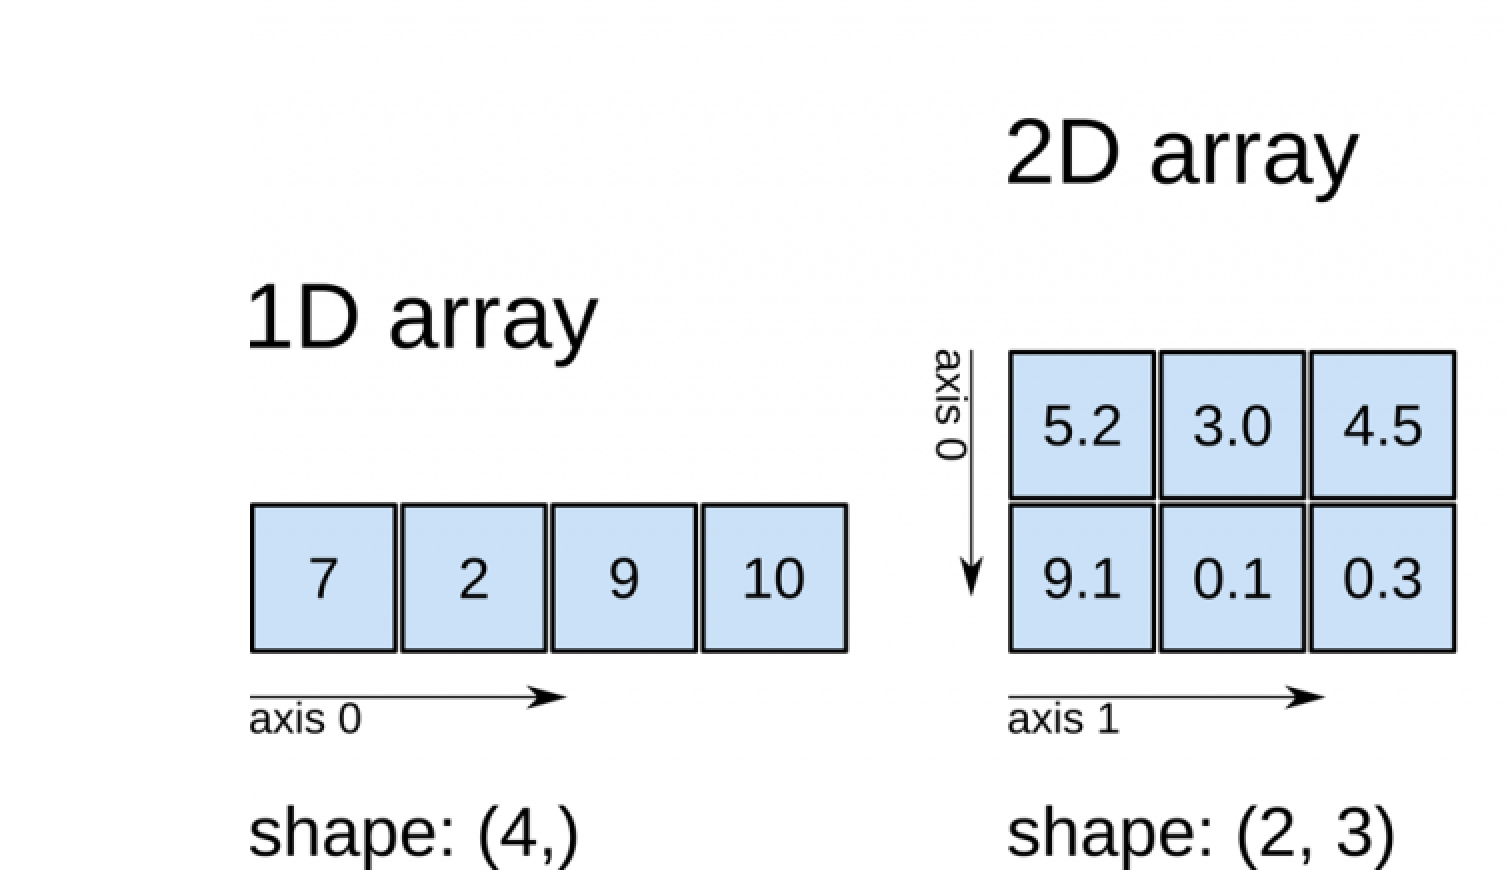

In [41]:
#número de eventos no dataset
#ak.num(tree['Muon_pt'].array(), axis=0)

In [42]:
#número de múons por evento
#ak.num(tree['Muon_pt'].array(), axis=-1)

In [43]:
#(2.3b)Verificar o conteúdo da tree : o número de branches, os nomes e os tipos de variáveis em cada branch.



In [44]:
#(2.3c)Verificar o conteúdo da tree : o número de branches, os nomes e os tipos de variáveis em cada branch.



# Extrair os dados em arrays do Awkward
# 3. Criar algumas condições de pré seleção

*   (3.1) selecionar os runs certificados "good runs";
*   (3.2) selecionar o trigger de múons;
*   (3.3) selecionar o algortimo de ID dos múons (tightID, softID, mediumID ou looseID);
*   (3.4) selecionar apenas 2 múons;
*   (3.5) selecionar apenas 2 múons de cargas opostas;
*   (3.6) combinar as condições(máscaras);

obs.: Verificar se está considerando apenas os eventos que passaram nos seus critérios de seleção.




**mask_lumi** é um array de valores booleanos (True e False) que indica se um evento específico deve ser considerado (com base em critérios como a luminosidade integrada, por exemplo), e que você quer adicionar isso à sua máscara de cortes combinados, que será usada para filtrar eventos em seus dados de colisão.

In [45]:
#3.1
#mask_lumi = build_lumi_mask('Cert_271036-284044_13TeV_Legacy2016_Collisions16_JSON.txt', tree, verbose=False)

#print(mask_lumi)
#print(len(mask_lumi))

Uma máscara é um array booleano que é gerado aplicando uma condição a um array de dados. Por exemplo, se quisermos apenas múons com pT > 20, nossa máscara seria:

Então, podemos aplicar a máscara aos nossos dados. A sintaxe segue outras operações de seleção de array padrão: data[mask].

Isso selecionará apenas os elementos dos nossos dados que correspondem a um True.



---



---



Antes das seleções, defina as variáveis.

*   variáveis cinemáticas do objeto múon
*   trigger
*   muon id
*   nr de múons
*   muons de cargas opostas
*   ...








In [46]:
# Verifique o número de eventos antes de qualquer corte


# 3.2
# Seleção do trigger


# 3.3
# Seleção do ID de múons

# 3.4
# Seleção do número de múons (número de múons = 2)

# 3.5
# Seleção de múons de cargas opostas
# Usando ak.combinations para verificar múons de cargas opostas

# 3.6
# Combinação de todas as máscaras, incluindo os "good runs"


* Aplicar essas condições nos objetos





In [47]:
# Agora, vamos aplicar todos os cortes nos objetos (múons), você pode verificar os arrays selecionados



Se você estiver utilizando awkward arrays, pode contar o número de elementos após aplicar a máscara:

Assim, você pode verificar se está considerando apenas os eventos que passaram nos seus critérios de seleção.

In [48]:
#plot o nr de múons

# 4. Plotar algumas variáveis cinemáticas de cada múon: p_T, η (pseudorapidez), ϕ, ...



(4.1) Plots antes de aplicar cortes no momento dos múons.

In [49]:
 #Usamos ak.zip (combinar) para obter pares de índices de múons em cada evento




In [50]:
# Printando as componentes dos muons


A notação [:, 0] funciona como uma fatia 2D do array, onde:

* : (antes da vírgula) significa "incluir todas as linhas", ou seja, "incluir todos os eventos". Isso seleciona ao longo da primeira dimensão do array, que corresponde aos diferentes eventos no seu conjunto de dados.

* O número após a vírgula ( 0 ou 1) seleciona um elemento específico na segunda dimensão, que corresponde aos múons dentro de cada evento. O 0 seleciona o primeiro múon em cada evento, e o 1 seleciona o segundo múon.

## Criar os plots de algumas variáveis cinemáticas para cada múon


(4.2) Agora, iremos aplicar cortes nos momentos transversos e nas $\eta$ dos múons.

*   $p^{mu1}_{T}$ > 12 GeV/c e $p^{mu2}_{T}$ > 4 GeV/c
*   |$\eta_{mu1, mu2}$ | < 2.4



In [51]:
# Criar máscaras para as condições de cada mu


Plotars as grandezas, $p_{T}$, $\eta$ e $\phi$, após os cortes.

# 5. Criaremos os 4-Vetores

vector.array: Cria um array de 4-vetores com os componentes pt, eta, phi e mass dos múons. Vamos criar os 4-vetores dos múons utilizando as componentes cinemáticas que você já aplicou os cortes em função de (pt, eta, phi, mass).

*   (5.1) Criar o 4-vetor para cada múon. .
*   (5.2) Somar os 4-vetores: Após selecionar os dois múons, somamos os seus 4-vetores para obter o 4-vetores do sistema





In [52]:
# (5.1) Criar os quatro-vetores dos múons


In [53]:
# (5.2) Somar os 4-vetores do par de múons



In [54]:
# Extraindo as propriedades do quadrivetor do par


# 6. Criar os plots de algumas variáveis cinemáticas do par

* (6.1) Plotar p_T e η do par de múons



* (7) Calcular a massa invariante do par de múons.



# Criar um dicionário com os dados desejados e, em seguida, um DataFrame a partir desse dicionário






* (8) Criar um dataframe e salvar as informações desejadas.